Jahn Juhlia Panda Lu

Student ID 47677759

# Assignment 2
### Deep Learning for Image Classification

---

## Task 1 - Data Exploration and Preparation

### 1.1 Data Exploration

Before diving into any dataset, it is always a must to gain a sufficient understanding of the data through data exploration. First, I will be importing the necessary libraries and modules for data loading, exploration, and visualization namely:
- `os`: This module is used for operating functionalities dependent on the system of the user, and this will be used in this notebook to navigate through the local directories of the containing folder to locate certain files or datasets.
- `matplotlib.pyplot`: This is the standard plotting library for creating visualizations and graphs, as well as displaying images and their properties. In this notebook, this will be used to visualize some images and the metadata associated with them.
- `tensorflow`: This library handles deep learning tasks, and in this notebook, it will be used to load, prepare, and manipulate image data.
- `numpy`: This library handles arrays with multiple dimensions and matrices. In this notebook, it will be used to work with image data in numeric form.

In [24]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

After importing the necessary libraries and modules, I will be defining the path to the dataset directory, specifically the training dataset -- because this set typically contains the bulk of the data which we will need to preprocess, analyze, and perform model training on.

In [25]:
data_dir = "data/seg_train"

I can observe that the folder structure of the dataset directories corresponds to different classes of the images contained within. 

![Folder Structure](images/folder_structure.png)

Using the `os` library, I can retrieve these classes from the dataset directory to help generate their respected labels. I will also sort the classes alphabetically and assign them to the variable `CLASS_NAMES`.

In [26]:
CLASS_NAMES = sorted(os.listdir(data_dir))
print("CLASS_NAMES:", CLASS_NAMES)

CLASS_NAMES: ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


I can observe that the class names in the dataset are the following:
- buildings
- forest
- glacier
- mountain
- sea
- street

Next, I will examine what an image from each class would typically look like to gain a more thorough understanding of the data I am dealing with and to get a better sense of what kind of images are contained within the dataset. Through this, I can also verify that the dimensions of each image are consistent throughout the dataset.

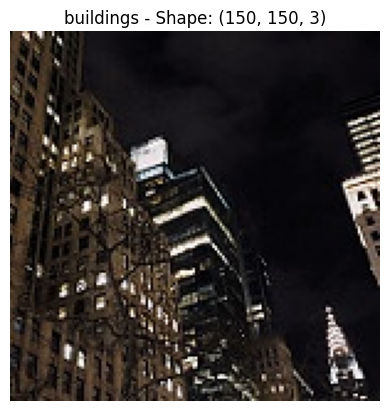

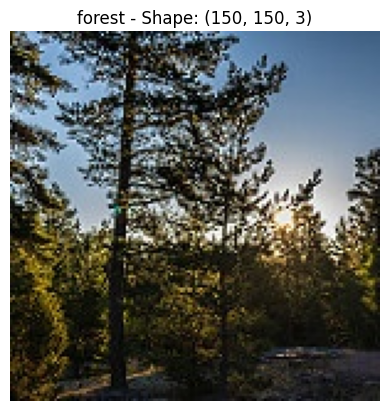

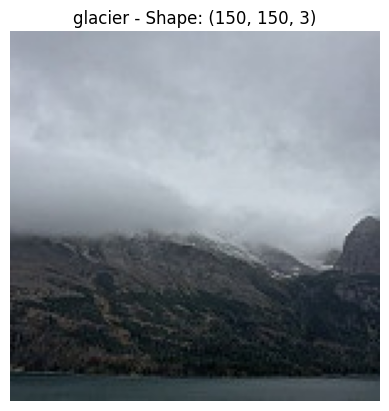

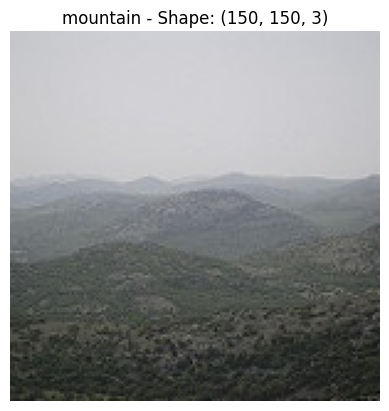

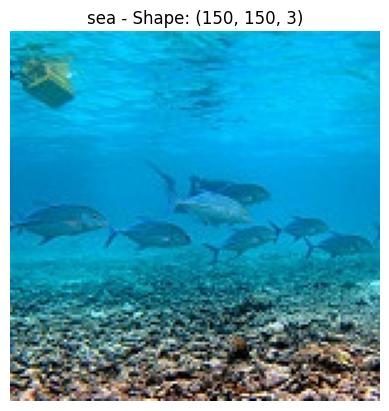

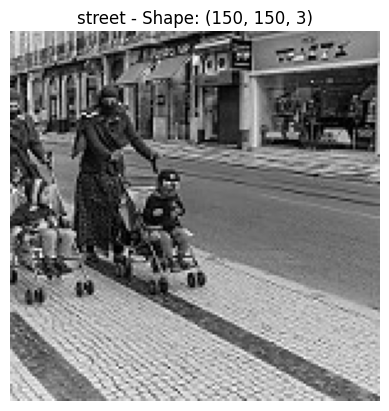

In [27]:
for class_name in CLASS_NAMES:
    # This will define the path to the current class in the for loop
    class_path = os.path.join(data_dir, class_name)
    
    # This will display the first image of the current class
    first_image_path = os.path.join(class_path, os.listdir(class_path)[0])
    img = plt.imread(first_image_path) # Read the image using matplotlib
    
    # Display the image along with its respective dimensions
    plt.imshow(img)
    plt.title(f"{class_name} - Shape: {img.shape}")
    plt.axis('off')
    plt.show()

I can observe that the images contained within the dataset have consistent dimensions of *(150, 150, 3)*, which means that each image is `150*150px`, with `3` channels representing the 3 RGB channels, indicating that the images all are in RGB format despite some images (the first image of the sea class, for example) appearing to be grayscale. The images having uniform dimensions and formatting is crucial for the neural network's functionality as deep learning models generally require uniform input dimensions.

Next, I will be counting the images per class, and I will be doing so in both the `training` and `test` directories to determine if there are any significant differences. I will first define the paths to both directories.

In [28]:
train_data = "data/seg_train"
test_data = "data/seg_test"

Next, I will be creating a function to count the number of images contained in each class for both the `training` and `test` set.

In [29]:
def count_images_per_class(directory):
    count = {}
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        img_count = len(os.listdir(class_path))
        count[class_name] = img_count
    return count

Now, I can call the image count function on the `training` and `test` set to check the count of images contained in each class within.

In [30]:
train_count = count_images_per_class(train_data)
test_count = count_images_per_class(test_data)

print("Training set image count by class:")
for class_name, count in train_count.items():
    print(f"{class_name}: {count} images")

print("\nTest set image count by class:")
for class_name, count in test_count.items():
    print(f"{class_name}: {count} images")

Training set image count by class:
forest: 2271 images
buildings: 2191 images
glacier: 2404 images
street: 2382 images
mountain: 2512 images
sea: 2274 images

Test set image count by class:
forest: 474 images
buildings: 437 images
glacier: 553 images
street: 501 images
mountain: 525 images
sea: 510 images


To gain a better understanding, I will be visualizing these results using a bar chart. I will use `.keys()` and `.values()` to list each class name and its corresponding count for the training and test sets.

In [31]:
train_classes = list(train_count.keys())
train_values = list(train_count.values())

test_classes = list(test_count.keys())
test_values = list(test_count.values())

After extracting the values, I will create two subplots -- one for the `training` set, and another for the `test` set.

/var/folders/ch/6rl7h19s1bzbs_ncpbszlktr0000gn/T/ipykernel_53579/3252237475.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(train_classes, rotation=45)
/var/folders/ch/6rl7h19s1bzbs_ncpbszlktr0000gn/T/ipykernel_53579/3252237475.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(test_classes, rotation=45)


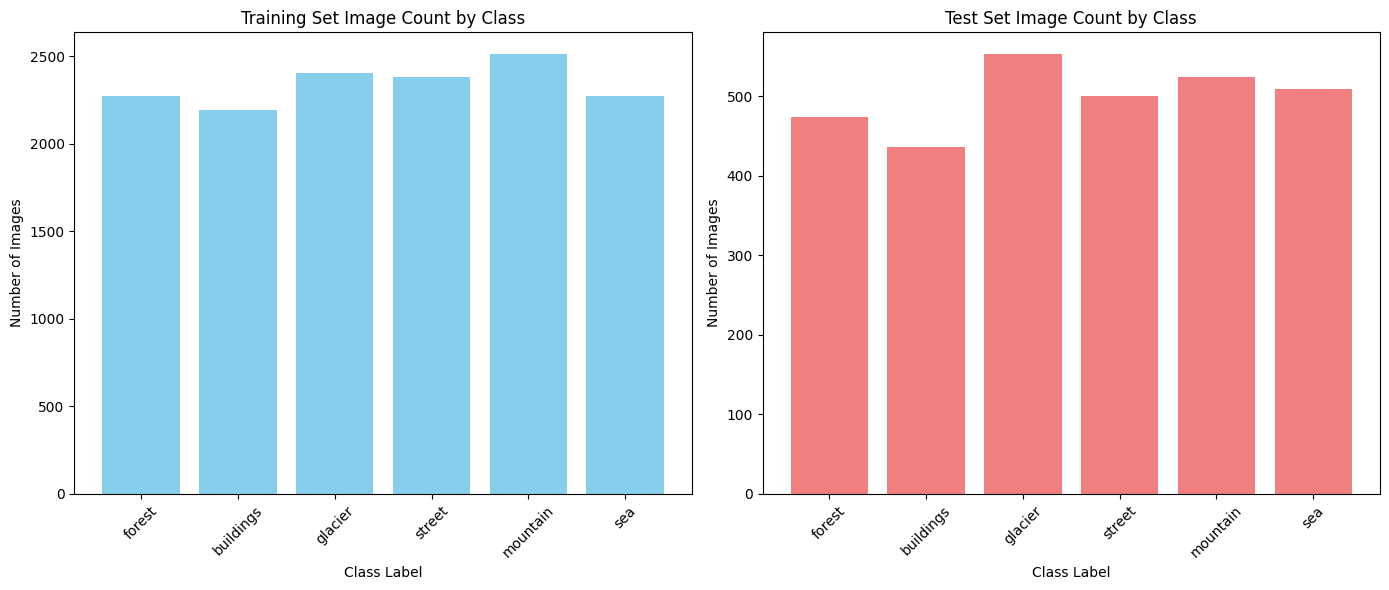

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Training Set
axes[0].bar(train_classes, train_values, color='skyblue')
axes[0].set_title('Training Set Image Count by Class')
axes[0].set_xlabel('Class Label')
axes[0].set_ylabel('Number of Images')
axes[0].set_xticklabels(train_classes, rotation=45)

# Test Set
axes[1].bar(test_classes, test_values, color='lightcoral')
axes[1].set_title('Test Set Image Count by Class')
axes[1].set_xlabel('Class Label')
axes[1].set_ylabel('Number of Images')
axes[1].set_xticklabels(test_classes, rotation=45)

plt.tight_layout()
plt.show()

Based on the analytics above, I can make the following observations:
- The training and test set contains a relatively balanced image count across all six classes with very little variation. This eliminates a lot of bias towards any of the classes, especially with a model that is tuned well.
- The test set contains sufficient images per class which will allow for a sufficient evaluation of the model's performance on unseen data. 

Additional techniques may be implemented during model training depending on the performance of the model, however with the observations on the dataset above, it is safe to assume that the model should generalize well across all classes.

## Task 1.2 - Preparation

To retain uniformity across images, I will be initializing the image size variable and setting it with a value of `(150,150)`. I will also be setting the batch size variable with a value of `32`. 

In [33]:
IMG_SIZE = (150, 150)
BATCH_SIZE = 32

I will first initialize the training set using TensorFlow's `image_dataset_from_directory`.

In [34]:
train_set = tf.keras.preprocessing.image_dataset_from_directory(
    train_data,
    validation_split=0.2,  # Using validation_split and setting it to 0.2 to use 20% of the data for validation and 80% for training
    subset="training",  # Setting the subset property to training so that TensorFlow uses the 80% of the data for training
    seed = 1234,  # Setting the seed to 1234 to ensure the same split every
    image_size=IMG_SIZE,  # Resize all the images to the IMG_SIZE value set earlier 
    batch_size=BATCH_SIZE,  # Use the BATCH_SIZE value set earlier
    label_mode="int",  # Sets integer labels for classification 
    color_mode="rgb",  # Sets 3 color channels for all images         
    shuffle=True  # Ensures that the data is shuffled before training
)

Found 14034 files belonging to 6 classes.
Using 11228 files for training.


Next, I will be initializing the validation set using the same process.

In [35]:
validation_set = tf.keras.preprocessing.image_dataset_from_directory(
    train_data,
    validation_split=0.2,  # Using validation_split and setting it to 0.2 to use 20% of the data for validation and 80% for training
    subset="validation",  # Setting subset to validation so TensorFlow uses the 20% of the data for validation
    seed=1234,  # Ensure the same split every time
    image_size=IMG_SIZE,  # Resize all the images to the IMG_SIZE value set earlier 
    batch_size=BATCH_SIZE,  # Process data in batches of 32
    label_mode="int",  # Sets integer labels for classification 
    color_mode="rgb",  # Sets 3 color channels for all images     
    shuffle=True  # Ensures that the data is shuffled before validation
)

Found 14034 files belonging to 6 classes.
Using 2806 files for validation.


Because the test data has already been separated and placed into a different folder, I will be initializing with `test_data` I set earlier.

In [36]:
test_set = tf.keras.preprocessing.image_dataset_from_directory(
    test_data,
    image_size=IMG_SIZE,  # Resize all images to 150x150
    batch_size=BATCH_SIZE,  # Process data in batches of 32
    label_mode="int",  # Integer labels for classification
    color_mode="rgb",  # Ensure 3 color channels (RGB)
    shuffle=True  # Shuffle data before testing
)

Found 3000 files belonging to 6 classes.


Normalizing the data is a crucial step in building deep learning models as it helps improve the model's training stability, convergence speed, and compatibility (a lot of deep learning models expect normalized input). Neural networks typically depend on small and consistent inputs for a smoother training process, and larger values could cause fluctuations in the gradients and affect training stability -- thus the data would need to be optimized with `.Rescaling(1./255)` to ensure that each pixel value is between 0 and 1, instead of the original 0 and 255. This is done through normalization by multiplying each pixel by 1/255.

In [37]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

I can then apply the normalization layer to the train, validation, and test sets initialized earlier.

In [38]:
train_set = train_set.map(lambda x, y: (normalization_layer(x), y))
validation_set = validation_set.map(lambda x, y: (normalization_layer(x), y))
test_set = test_set.map(lambda x, y: (normalization_layer(x), y))

To ensure that the dataset is prepared correctly before commencing the training process, I will be checking the image and label batch shapes of an example batch.

In [39]:
for image_batch, label_batch in train_set.take(1):
    print(f"Image batch shape: {image_batch.shape}")
    print(f"Label batch shape: {label_batch.shape}")

Image batch shape: (32, 150, 150, 3)
Label batch shape: (32,)


2024-09-07 22:53:24.187057: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


The results indicate that the images have been resized to `150*150px` and have 3 channels (RGB). Both have a batch size of 32 as initialized with the `BATCH_SIZE` variable.

---

## Task 2 - A Simple Classifier

### 2.1 First Classifier

The simple classifier I will build will consist of the following:
- **Flatten Layer**: flattens the image into a 1D vector
- **Output Layer**: the final predictions of the network for each input image; in one case, it will have one unit for each class

I will start by importing the necessary modules.

In [40]:
import tensorflow as tf
from tensorflow.keras import layers, models

First, I will be initializing the number of classes by getting the length of `CLASS_NAMES` with `len()`.

In [41]:
num_classes = len(CLASS_NAMES)

I can now initialize the simple model using `.Flatten()` to flatten the 150x150x3 images into 1D vector as the dense layer requires 1D input. After flattening the data, I will use `.Dense()` and set the last layer with the `softmax` activation function, which will ensure that the output layer contains the probabilities that the model will base its final predictions on.

In [42]:
model = models.Sequential([
    layers.Flatten(input_shape=(150, 150, 3)),  
    layers.Dense(num_classes, activation='softmax')  
])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


To compile the model, I will be using `adam` as the optimizer, as it is commonly used due to its speed and efficiency. As the labels have not been one-hot encoded, I will be using `sparse_categorical_crossentropy` as the loss function. This is because TensorFlow automatically sets the class labels to *integer* values when `image_dataset_from_directory` is used.

In [43]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  
              metrics=['accuracy'])

To get a summary of the model, I will be using `.summary()`.

In [44]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 67500)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │       405,006 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 405,006 (1.54 MB)

 Trainable params: 405,006 (1.54 MB)

 Non-trainable params: 0 (0.00 B)

I will proceed to training the model on the training data, using only 20% of the training data to determine when to stop training.

In [45]:
history = model.fit(
    train_set, 
    validation_data=validation_set,  
    epochs=10  
)

Epoch 1/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3404 - loss: 9.2927 - val_accuracy: 0.3845 - val_loss: 3.5059
Epoch 2/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4134 - loss: 4.0829 - val_accuracy: 0.4359 - val_loss: 3.6233
Epoch 3/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4669 - loss: 3.4060 - val_accuracy: 0.4793 - val_loss: 2.6301
Epoch 4/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4727 - loss: 3.0271 - val_accuracy: 0.4658 - val_loss: 2.9729
Epoch 5/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4733 - loss: 3.4471 - val_accuracy: 0.4487 - val_loss: 2.4210
Epoch 6/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5138 - loss: 2.9005 - val_accuracy: 0.4277 - val_loss: 2.6224
Epoch 7/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5384 - loss: 2.4753 - val_accuracy: 0.4626 - val_loss: 4.1985
Epoch 8/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5534 - loss: 2.6820 - val_accuracy: 0.

After fitting the model to the training data, to the training set, I will test the model on the test set to determine its accuracy on unseen data.

In [ ]:
test_loss, test_accuracy = model.evaluate(test_set)
print(f"Test accuracy: {test_accuracy:.4f}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4470 - loss: 4.0930
Test accuracy: 0.4437


The accuracy results indicate that the model correctly classified only 44.70% of the test data, with a high loss of 4.0930. This means that the model does not generalize well with unseen data. This is most likely due to the fact that the model is too simple for the dataset, and the fact that the model does not have any hidden layers to learn more abstract features from the images in the dataset.

### Task 2.2 - A More Complex Classifier
As the first model was too simple for the dataset, I will be creating a more complex classifier model by adding hidden layers with dropout using `keras_tuner`.

I will import `keras_tuner` to search for the best hyperparameters of the model and build a model based off of those hyperparameters, which I will then evaluate on the test set.

In [47]:
import keras_tuner as kt

In [88]:
def build_model(hp):
    model = models.Sequential()
    
    # Flatten input into a 1D vector
    model.add(layers.Flatten(input_shape=(150, 150, 3)))

    # This will allow me to tune the hidden layers to be between 1 and 3
    for i in range(hp.Int('num_layers', 1, 3)):
        # This will allow me to tune the number of units in each hidden layer between 256 and 512
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=256,
                                            max_value=512,
                                            step=64),
                               activation='relu'))
        
        # This will allow me to tune the dropout rate to be between 0.3 and 0.5
        model.add(layers.Dropout(rate=hp.Float('dropout_' + str(i),
                                               min_value=0.3,
                                               max_value=0.5,
                                               step=0.1)))
    
    # Adding a dense layer with 6 filters for classification
    model.add(layers.Dense(6, activation='softmax'))

    # This will allow me to tune the learning rate to be between 0.001, 0.0001, and 0.00101
    model.compile(optimizer=tf.keras.optimizers.Adam(
                  hp.Choice('learning_rate', values=[0.001, 0.0001, 0.0001])),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

For this subtask, I will be using `Hyperband` from `keras_tuner` as it fits image classification quite well, due to the fact that it stops poorly performing hyperparameter configurations early. As deep learning models are complex and a large amount of time is required to train them, tuning can be computationally expensive, and `Hyperband` saves time and resources by not spending them on trials that do not appear promising. I used the [official documentation from TensorFlow](https://www.tensorflow.org/tutorials/keras/keras_tuner) as a resource to form my code.

To stop the tuner search from being too time consuming, I will add an `early_stopping` callback to ensure that it stops when validation accuracy is not showing improvement after 3 epochs. This will ensure that it does not waste resources and time on unnecessary trials with hyperparameter configurations that do not look promising.

In [89]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',  
    patience=3, 
    mode='max',  
    restore_best_weights=True  
)

In [91]:
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=3,  
    factor=3,  
    executions_per_trial=3,  
    directory='my_dir',
    project_name='image_classification_tuning'
)

tuner.search(train_set, validation_data=validation_set, epochs=3, callbacks=[early_stopping], batch_size=256)

Trial 6 Complete [00h 05m 48s]
val_accuracy: 0.18104062974452972

Best val_accuracy So Far: 0.4836065669854482
Total elapsed time: 00h 23m 32s


After tuning the hyperparameters, I can get the best hyperparameters for the model using `.get_best_hyperparameters()`. All of the trial data was saved into the `my_dir` directory so that when reloading the notebook or if any interruptions occur, the tuner search can be resumed from where it left off.

In [92]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

In [93]:
print(f"Best Hyperparameters")
print(f"number of layers: {best_hps.get('num_layers')}")
print(f"units in first layer: {best_hps.get('units_0')}")
print(f"dropout rate: {best_hps.get('dropout_0')}")
print(f"learning rate: {best_hps.get('learning_rate')}")

Best Hyperparameters
number of layers: 2
units in first layer: 256
dropout rate: 0.3
learning rate: 0.0001


I can then build the best model using the best hyperparameters of the model I set the `best_hps` variable with.

In [94]:
best_model = tuner.hypermodel.build(best_hps)

After building the best model and assigning it to `best_model`, I can then train the model on the validation set.

In [95]:
history = best_model.fit(train_set, validation_data=validation_set, epochs=10, batch_size=BATCH_SIZE)

Epoch 1/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 20s 57ms/step - accuracy: 0.2761 - loss: 1.8686 - val_accuracy: 0.4462 - val_loss: 1.4336
Epoch 2/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 20s 57ms/step - accuracy: 0.3827 - loss: 1.5129 - val_accuracy: 0.4697 - val_loss: 1.3599
Epoch 3/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 20s 57ms/step - accuracy: 0.3849 - loss: 1.5014 - val_accuracy: 0.4907 - val_loss: 1.3498
Epoch 4/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 20s 58ms/step - accuracy: 0.3991 - loss: 1.4764 - val_accuracy: 0.4936 - val_loss: 1.3093
Epoch 5/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 20s 57ms/step - accuracy: 0.4147 - loss: 1.4287 - val_accuracy: 0.4932 - val_loss: 1.3018
Epoch 6/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 20s 57ms/step - accuracy: 0.4229 - loss: 1.4279 - val_accuracy: 0.5086 - val_loss: 1.3253
Epoch 7/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 20s 57ms/step - accuracy: 0.4250 - loss: 1.4202 - val_accuracy: 0.4904 - val_loss: 1.3062
Epoch 8/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 21s 59ms/step - accuracy: 0.4297 - loss: 1.4014 - 

The training accuracy increased to around 44.15% over the epochs, reaching a validation accuracy of 51.10%. These are still relatively low numbers, even after hyperparameter tuning.

After training the model on the validation set, I will proceed to evaluate the model on the test dataset to gauge how it performs on unseen data.

In [96]:
test_loss, test_accuracy = best_model.evaluate(test_set)
print(f"Test accuracy: {test_accuracy:.4f}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5262 - loss: 1.2761
Test accuracy: 0.5070


On the test set, the model achieved a test accuracy of 50.70%. The validation accuracy plateaud at around ~1.2 - ~1.3, which indicates that more training may not have entailed further improvements.

### Task 2.3 Error Analysis

**1. Which system had a better accuracy on the test data?**

Both systems achieved the following test accuracies:
- `Simple Model`: 44.70%
- `More Complex Classifier`: 50.70%

The more complex classifier model tuned with Hyperband had a slightly higher accuracy on the test data in comparison to the simple model. From this, it is evident that the additional tuning of hyperparameters (dropout, learning rate, and number of hidden layers) helped the model perform a little bit better on unseen data.

**2. Which system had a lower degree of overfitting?**

*Training Accuracies*
- `Simple Model`: 57.66%
- `More Complex Classifier`: 44.15%

*Validation Accuracies*
- `Simple Model`: 44.01%
- `More Complex Classifier`: 51.10%

It is clear to see that the `More Complex Classifier` has a lower degree of overfitting as the gap within is training accuracy of **57.66%** and its validation accuracy **44.01%** is lower than the gap between the training accuracy and validation accuracies of the `Simple Model`. This means that the Simple Model was not generalizing well to the validation data despite generalizing to the training data.

Overall, the more complex classifier model performed better on the test data because of the additional hyperparameter tuning despite its training and validation accuracy results indicating overfitting. Hoever, the simple model showed that it had a better balance between training and validation performance. 

---

## Task 3 - A More Complex Classifier

### Task 3.1 - Using Convnets
For this subtask, I will be implementing a model using a **Convolutional Neural Network** with at least two convolutional layers, each followed by `MaxPooling2D`. This will downsample the feature maps of the data, which is a common practice when dealing with tasks like image classification. This helps reduce the images' spatial dimensions while preserving their most important features.

First, I will be initializing a ConvNet Model by creating a function `create_convnet_model`.

The parameters chosen and code below are based on the `Week 5` learning material. Since we are dealing with computationally heavy data, the first Conv2D layer uses 16 filters, and the second uses 32. The Dense layer combines all learned features from the first two layers and uses 6 filters for classification. The `ReLU` activation function is typically used for hidden layers, while the `softmax` activation function is typically used for output layers. The kernel size of `(3x3)` is also a standard choice for balancing model performance and efficiency. The added pooling layers help down-sample the feature maps, which will reduce the computational complexity of the model without disregarding important features.

I also used `GlobalAveragePooling2D()` instead of `Flatten()` because instead of converting the output from the last `Conv2D` layer into a large 1D vector with exponentially more parameters, it reduces the size of the feature map to a fixed-size vector (1 value per feature map channel). This will reduce the number of parameters which will prevent overfitting. It helps the model learn more generalized features across the entire image, rather than very specific localized features ([Saturn Cloud, 2023](https://saturncloud.io/blog/understanding-the-difference-between-flatten-and-globalaveragepooling2d-in-keras/)).

In [ ]:
def create_convnet_model():
    model = models.Sequential()

    # I will now create the first Conv2D layer using a relu activation function
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))

    # After the first Conv2D layer, I will add a MaxPooling2D layer with a pool size of (2, 2)
    model.add(layers.MaxPooling2D((2, 2)))

    # I will now add another Conv2D layer with a relu activation function
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))

    # After the second Conv2D layer, I will add another MaxPooling2D layer with a pool size of (2, 2)
    model.add(layers.MaxPooling2D((2, 2)))

    # I will also add a third Conv2D layer and MaxPooling 2D layer to add complexity to the model and help it understand more complex features in the data
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # I will flatten the output of the previous layer to prepare it for the dense layer
    model.add(layers.GlobalAveragePooling2D())

    # Finally, I will add the output layer with the softmax activation function
    model.add(layers.Dense(6, activation='softmax'))

    # I will now compile the model using the previous parameters used to compile the previously tuned model 
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

After creating the convnet model builder function, I will now call it and assign it to the variable `convnet_model`.

In [ ]:
convnet_model = create_convnet_model()
convnet_model.summary()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 94,022 (367.27 KB)

 Trainable params: 94,022 (367.27 KB)

 Non-trainable params: 0 (0.00 B)

I can now train the model on the training and validation sets with 10 epochs. I set the `batch_size` parameter to 8 to ensure that the training process does not consume a lot of resources. Without the additional `batch_size` parameter, my computer was experiencing several crashes and high CPU usage.

I will be implementing the `early_stopping` callback to ensure that the model does not overfit the training set.

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [ ]:
history = convnet_model.fit(train_set, validation_data=validation_set, epochs=10, batch_size=64, callbacks=[early_stopping])

Epoch 1/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 77s 217ms/step - accuracy: 0.3877 - loss: 1.4295 - val_accuracy: 0.5852 - val_loss: 1.0073
Epoch 2/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 77s 220ms/step - accuracy: 0.5818 - loss: 1.0282 - val_accuracy: 0.6258 - val_loss: 0.9793
Epoch 3/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 78s 223ms/step - accuracy: 0.6444 - loss: 0.9186 - val_accuracy: 0.7024 - val_loss: 0.8168
Epoch 4/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 81s 231ms/step - accuracy: 0.6823 - loss: 0.8515 - val_accuracy: 0.6654 - val_loss: 0.8674
Epoch 5/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 86s 246ms/step - accuracy: 0.7074 - loss: 0.7988 - val_accuracy: 0.7092 - val_loss: 0.7635
Epoch 6/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 86s 244ms/step - accuracy: 0.7456 - loss: 0.7309 - val_accuracy: 0.7363 - val_loss: 0.7214
Epoch 7/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 86s 245ms/step - accuracy: 0.7585 - loss: 0.7014 - val_accuracy: 0.7584 - val_loss: 0.6741
Epoch 8/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 89s 252ms/step - accuracy: 0.7689 - loss: 0

After training the convnet model on the training and validation sets, I can now verify the accuracy of the model on the test set.

In [ ]:
test_loss, test_accuracy = convnet_model.evaluate(test_set)
print(f"Test accuracy: {test_accuracy:.4f}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - accuracy: 0.7890 - loss: 0.6004
Test accuracy: 0.7930


The results indicate that the model generalized better throughout the epochs during training, reaching a validation accuracy of 80.22% at the last epoch from 58.52% during the first epoch. It's consistent and steady improvement is why the `early_stopping` callback was not triggered. To further emphasize this consistency, the model achieved an accuracy of 79.30% on the test set, which is very close to the final validation accuracy of 80.22% during the training process. There are no signs of the model overfitting to the data as the accuracy and validation accuracy values remain close to one another's values as each epoch progresses. The model might show signs of improvement should I increase the number of epochs I set to it as it was showing steady improvements.

### Task 3.2 - Using Pre-Trained Models

For this subtask, I will be using **MobileNet**, a pre-trained convolutional neural network trained on *ImageNet* known for its efficiency.

In [ ]:
mobilenet_model = tf.keras.applications.MobileNet(input_shape=(150, 150, 3),
                                             include_top=False,  # I will exclude the top fully connected layer
                                             weights='imagenet',  # I will also use pre-trained weights from ImageNet
                                             pooling='avg')  

/var/folders/ch/6rl7h19s1bzbs_ncpbszlktr0000gn/T/ipykernel_49933/2762078653.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  mobilenet_model = tf.keras.applications.MobileNet(input_shape=(150, 150, 3),


I will then set the `LEARNING_RATE` to a standard value of **0.001**. I will also initialize the default parameters for the images in the dataset.

In [ ]:
LEARNING_RATE = 0.001
IMG_HEIGHT = 150
IMG_WIDTH = 150
IMG_CHANNELS = 3

I will also freeze the base model by setting `layer.trainable` to `False` for each layer in `mobilenet_model.layers` to **false**, as the pre-trained layers of MobileNet are frozen. This ensures that only the custom classification head is trained.

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)))
model.add(mobilenet_model)
model.add(tf.keras.layers.Dense(num_classes, activation='softmax', name='classification'))

Now, I can compile the model using the `Adam` optimizer and the learning rate set earlier.

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_224 (Functional) │ (None, 1024)           │     3,228,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classification (Dense)          │ (None, 6)              │         6,150 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,235,014 (12.34 MB)

 Trainable params: 3,213,126 (12.26 MB)

 Non-trainable params: 21,888 (85.50 KB)

Out of all the models created throughout the notebook, this is the only one with non-trainable parameters, which could possibly be the weights from pre-trained MobileNet that are frozen.

Before training the model, I will be specifying a variable learning rate to optimize the training process and improve the model's performance. This is because using a variable learning rate does the following:
- Starts with small values to prevent overshooting.
- Increases and sustains the learning rate in the middle of training to progress faster.
- Fine tunes the weights towards the end of the training process using a slower learning rate.

In [ ]:
EPOCHS = 5
BATCH_SIZE = 128

LR_START = 0.00001
LR_MAX = 0.00001
LR_MIN = 0.000001
LR_RAMPUP_EPOCHS = 0
LR_SUSTAIN_EPOCHS = 0
LR_EXP_DECAY = .93

The learning rate function below was sourced from the `Week 4` Flowers Mobilenet Training Notebook.

In [ ]:
def lrfn(epoch):
    if epoch < LR_RAMPUP_EPOCHS:
        lr = (LR_MAX - LR_START) / LR_RAMPUP_EPOCHS * epoch + LR_START
    elif epoch < LR_RAMPUP_EPOCHS + LR_SUSTAIN_EPOCHS:
        lr = LR_MAX
    else:
        lr = (LR_MAX - LR_MIN) * LR_EXP_DECAY**(epoch - LR_RAMPUP_EPOCHS - LR_SUSTAIN_EPOCHS) + LR_MIN
    return lr


I will now create a callback for the LearningRateScheduler created previously.

In [ ]:
lr_callback = tf.keras.callbacks.LearningRateScheduler(lrfn, verbose=True)

After creating the callback, I can now proceed to training the model.

In [ ]:
history = model.fit(train_set, validation_data=validation_set, epochs=EPOCHS, batch_size= BATCH_SIZE, callbacks=[lr_callback])


Epoch 1: LearningRateScheduler setting learning rate to 1e-05.
Epoch 1/5
351/351 ━━━━━━━━━━━━━━━━━━━━ 201s 560ms/step - accuracy: 0.4999 - loss: 1.4712 - val_accuracy: 0.8293 - val_loss: 0.4659 - learning_rate: 1.0000e-05

Epoch 2: LearningRateScheduler setting learning rate to 9.370000000000002e-06.
Epoch 2/5
351/351 ━━━━━━━━━━━━━━━━━━━━ 200s 570ms/step - accuracy: 0.8485 - loss: 0.4307 - val_accuracy: 0.8781 - val_loss: 0.3526 - learning_rate: 9.3700e-06

Epoch 3: LearningRateScheduler setting learning rate to 8.784100000000001e-06.
Epoch 3/5
351/351 ━━━━━━━━━━━━━━━━━━━━ 248s 707ms/step - accuracy: 0.8905 - loss: 0.3247 - val_accuracy: 0.8902 - val_loss: 0.3190 - learning_rate: 8.7841e-06

Epoch 4: LearningRateScheduler setting learning rate to 8.239213000000001e-06.
Epoch 4/5
351/351 ━━━━━━━━━━━━━━━━━━━━ 210s 598ms/step - accuracy: 0.9073 - loss: 0.2712 - val_accuracy: 0.8952 - val_loss: 0.3016 - learning_rate: 8.2392e-06

Epoch 5: LearningRateScheduler setting learning rate to 7.7

In [ ]:
test_loss, test_accuracy = model.evaluate(test_set)
print(f"Test accuracy: {test_accuracy:.4f}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 10s 110ms/step - accuracy: 0.8955 - loss: 0.2945
Test accuracy: 0.8940


The model starts out with a training accuracy of **49.99%** and a validation accuracy of **82.93%**, which shows us that the pre-trained MobileNet model has already adapted well by capturing important features in the data. Its final training accuracy reached **92.70%** from the first epoch at **49.99%**. The final validation and accuracy of **89.52%** is close to the test accuracy the model achieved of **89.40%**, which shows that the model performed consistently and generalized well to unseen data. The usage of the variable learning rate and the fine-tuning of the pre-trained MobileNet model allowed the model to converge well and maintain high performance across training, validation, and test sets. Out of all the models that were created throughout this notebook, this was the most powerful model.

### Task 3.3 - Comparative Evaluation

The best model was the `MobileNet Model`, achieving a test accuracy of **89.55%**. MobileNet is known for its efficient architecture despite using fewer parameters compared to larger convolutional networks. Adding in the learning rate decay helped the model fine-tune its weights without the risk of overfitting or fluctuations in performance. Its consistent performance throughout the validation and test sets indicate that it was able to generalize well for this image classification task.

**1. Confusion Matrix**

To get the Confusion Matrix of the `MobileNet Model`, I will begin by importing the necessary modules to plot the matrix and display the images.

- `confusion_matrix`: To generate the confusion matrix
- `seaborn`: To display the confusion matrix in a more visually appealing format

In [130]:
import seaborn as sns

To get the true labels, I will start by iterating through the test set and extracting the image data (`x`) and their corresponding true labels (`y`). It will then concatenate the list of label batches into a single array, stored into the array `true_labels`.

In [131]:
true_labels = np.concatenate([y for x, y in test_set], axis=0)

To get the predictions on the test set, I will be using `.predict()` on the `MobileNet` model, resulting in a numpy array of predictions of each class, assigned to the array `predictions`.

In [132]:
predictions = model.predict(test_set)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


To convert these into class labels, I will be using `np.argmax()` to convert the array into class labels, with `axis=1` representing the classes, which will give the indexof the class with the highest predicted probability.

In [133]:
predicted_labels = np.argmax(predictions, axis=1)

After getting the true and predicted labels, I can then create the confusion matrix through Tensorflow using the function `tf.math.confusion_matrix()` with *true labels* for the y axis and the *predicted labels* for the x axis. To visualize better, I will use Seaborn's `heatmap`.

In [134]:
cm = tf.math.confusion_matrix(true_labels, predicted_labels)

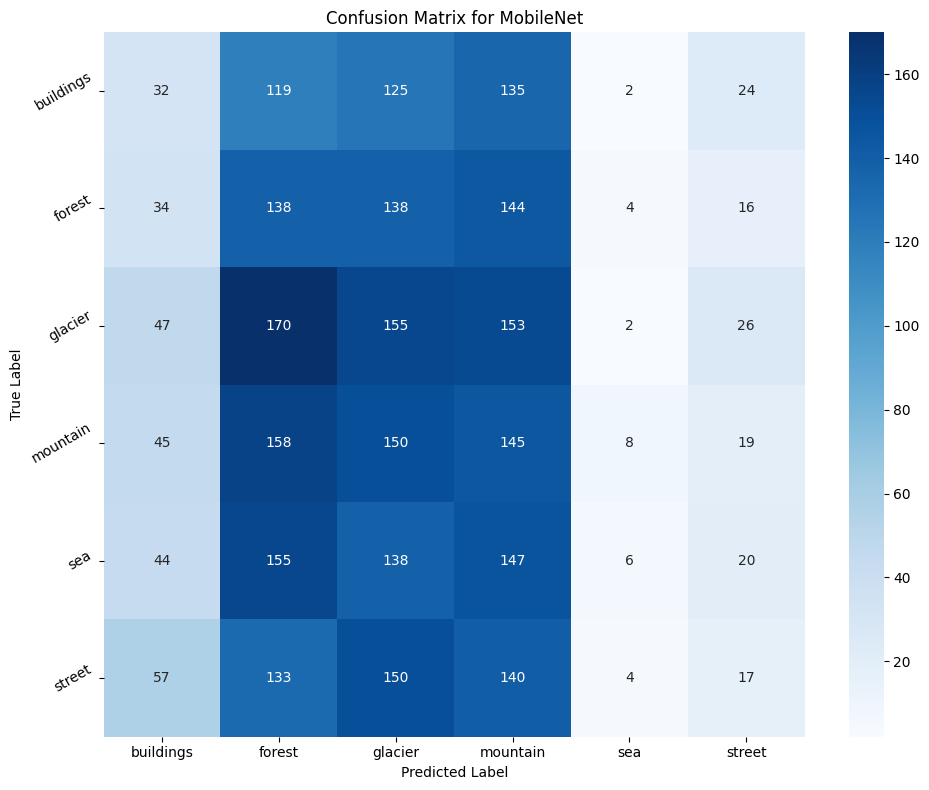

In [191]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=CLASS_NAMES, yticklabels=CLASS_NAMES)
plt.title('Confusion Matrix for MobileNet')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.yticks(rotation=30)
plt.tight_layout()
plt.show()

Based on the confusion matrix generated, I can make the following observations:

**Correct Predictions**
- The highest correct classifications are within the `glacier` class with 162 correct predictions.
- The lowest correct classifications are within the `buildings` class with only 46 correct predictions.

**Misclassifications**
  - The highest misclassified classes are the `forest`, `glacier`, and `sea`, and based on the confusion matrix, it is evident that they are frequently misclassified as one another.
- 170 `glacier` images are misclassified as `forest`, yielding the highest amount of misclassifications.
- This could be due to the fact that they have overlapping, more complex visual textures, colors, and environmental elements that the model struggles to understand.

**2. Misclassified Images**

To display the images from the test set with the classification errors, I will initialize two variables, `true_class` and `predicted_class` and set them to the indexes of `glacier` and `forest` respectively.

In [168]:
true_class = CLASS_NAMES.index('glacier')
predicted_class = CLASS_NAMES.index('forest')

I can then get the indices of the true and predicted class labels of `forest` and `glacier` using `np.where()` with the following conditions:
- `true_label` is the index of `glacier`
- `predicted_label` is the index of `forest`

In [169]:
misclassified_indices = np.where((true_labels == true_class) & (predicted_labels == predicted_class))[0]

I will then initialize 3 empty lists to store the misclassified images, their true labels, and their predicted labels respectively.

In [157]:
misclassified_images = []
misclassified_true_labels = []
misclassified_predicted_labels = []

I will then loop through the test set and pick individual images in batches, as we are dealing with a large amount of data. When using `.image_dataset_from_directory()`, images are loaded by batch determined by the batch size set (in this case, it was 32). I can use the `image_batch` and `label_batch` with `enumerate` to get the index numbers of the batch currently being processed.

In [188]:
for i, (img_batch, label_batch) in enumerate(test_set):
    batch_size = len(img_batch)

    # Since the model predicts on the whole test set at once and does not separate predictions by batch, I will need to manually slice the labels by batch
    # In this case, I am using the index number multiplied to the batch size to get the start index of the range of labels and the current batch index multiplied to the batch size to get the end index of the labels
    start_index = i * batch_size
    end_index = (i + 1) * batch_size
    predicted_labels_batch = predicted_labels[start_index:end_index]


    # Next, I will need to loop over the current batch of images, predicted labels, and true labels
    # I will be using zip() to loop over the three lists at the same time to return one img, its true_label, and its predicted_label
    for img, true_label, predicted_label in zip(img_batch, label_batch, predicted_labels_batch):
        if len(misclassified_images) >= 5:  # This will make the loop stop iterating after 5 misclassified images are stored
            break

        # Next, I will need to check if the true label of an image is 'glacier' and its predicted label is 'forest'
        if true_label == CLASS_NAMES.index('glacier') and predicted_label == CLASS_NAMES.index('forest'):
            misclassified_images.append(img.numpy())  # When the condition is true, it converts the img tensor into a NumPy Array so that it can be passed onto the matplotlib function plt.imshow()
            misclassified_true_labels.append(true_label)  # I will also append the true label to the misclassified_true_labels array
            misclassified_predicted_labels.append(predicted_label)  # I will also append the predicted label to the misclassified_predicted_labels array

    if len(misclassified_images) >= 5:
        break  # When misclassified images are at the count of 5, the loop will stop

After retrieving the images, I can display them with `Matplotlib`, using `plit.imshow()` to display the images after converting the `img` tensors to NumPy arrays.

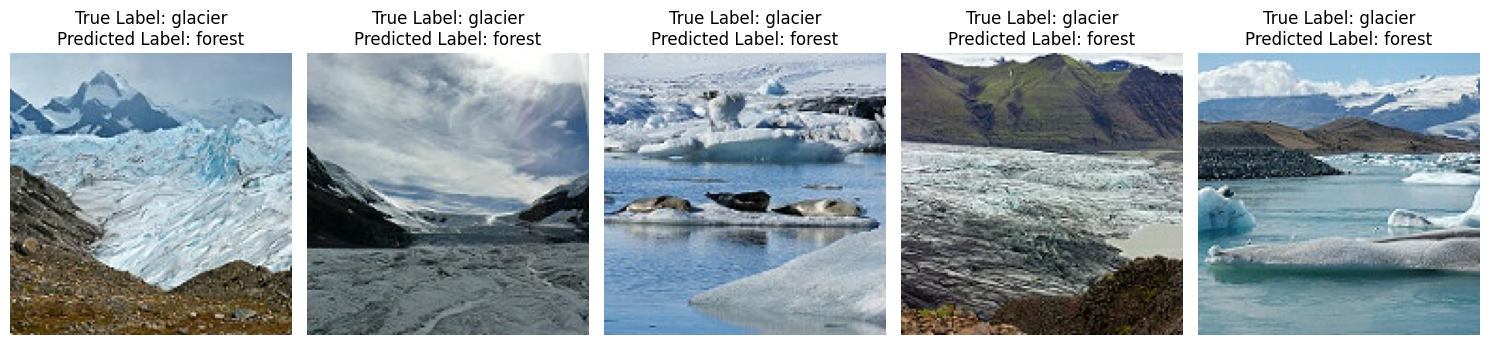

In [190]:
plt.figure(figsize=(15, 5))  

for i in range(len(misclassified_images)): 
        true_label_name = CLASS_NAMES[int(misclassified_true_labels[i])]
        predicted_label_name = CLASS_NAMES[int(misclassified_predicted_labels[i])]

        plt.subplot(1, 5, i + 1)
        plt.imshow(misclassified_images[i])
        plt.title(f"True Label: {true_label_name}\nPredicted Label: {predicted_label_name}")
        plt.axis('off')

plt.tight_layout()
plt.show()

---
## References

Li, L., Jamieson, K., DeSalvo, G., Rostamizadeh, A., & Talwalkar, A. (2018). Hyperband: A novel bandit-based approach to hyperparameter optimization. Journal of Machine Learning Research, 18(1), 6765-6816. http://jmlr.org/papers/v18/16-558.html

Saturn Cloud. (2023, November 30). Understanding the difference between flatten() and GlobalAveragePooling2D() in Keras. Saturn Cloud Blog. https://saturncloud.io/blog/understanding-the-difference-between-flatten-and-globalaveragepooling2d-in-keras/ 

TensorFlow. (n.d.). Hyperparameter tuning with Keras Tuner. TensorFlow. https://www.tensorflow.org/tutorials/keras/keras_tuner